# 导库

In [24]:
import os
import pandas as pd
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

from sklearn.preprocessing import StandardScaler

# 加载数据集

In [25]:
# 指定数据集文件夹路径
dataset_folder = '数据集'

# 遍历文件夹中的每个文件
for filename in os.listdir(dataset_folder):
    # 构建完整文件路径
    file_path = os.path.join(dataset_folder, filename)

    # 检查文件是否是Excel文件
    if file_path.endswith(('.xls', '.xlsx')):
        # 读取Excel文件
        df = pd.read_excel(file_path)

        # 将数据保存为CSV文件
        csv_filename = os.path.splitext(filename)[0] + '.csv'
        csv_path = os.path.join(dataset_folder, csv_filename)
        df.to_csv(csv_path, index=False)

        # 可选：删除原始Excel文件
        # os.remove(file_path)

        print(f"该文件 {filename} 被转换为csv格式 {csv_filename}")


In [26]:
# 读取时间序列数据和协变量数据
data = pd.read_csv('数据集/energydata_complete.csv')

# 脏数据处理

In [27]:
#数据排序
data = data.sort_values(by='date', ascending=True)

In [28]:
# 判断重复值
duplicate_values = data.duplicated().sum()

# 打印重复值统计
print("重复值统计：", duplicate_values)

if(duplicate_values != 0):
    #使用 drop_duplicates 方法删除重复值
    data_no_duplicates = data.drop_duplicates()


重复值统计： 0


In [29]:
# 判断缺失值
missing_values = data.isnull().sum()

# 打印缺失值统计
print("缺失值统计：")
print(missing_values)

# 使用 fillna 方法，用均值填充缺失值
#data_filled = data.fillna(data.mean())

缺失值统计：
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


# 标准化

In [30]:
# 确保数据包含时间列和至少一个目标变量（'Appliances'），除时间列之外的其他列作为协变量
time_series_data = data[['date']]
covariate_data = data.drop(columns=['date'])

In [31]:
# 创建 StandardScaler 对象
scaler = StandardScaler()

# 对数值型列进行标准化
covariate_data_scaled  = scaler.fit_transform(covariate_data)

# 特征工程

In [32]:
# 合并时间序列数据和协变量数据
merged_data = pd.concat([time_series_data, covariate_data], axis=1)

In [33]:
# 特征工程
features = merged_data.drop(columns=['date', 'Appliances', 'lights', 'RH_1', 'T2', 'T3','T6','T_out','Windspeed'])

# 目标变量
target = merged_data['Appliances']

# 数据集划分

In [34]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

# X_train: 训练集的协变量数据，是用于训练模型的特征集。
# X_test: 测试集的协变量数据，用于评估模型的性能。
# y_train: 训练集的目标变量数据，是用于训练模型的目标值集。
# y_test: 测试集的目标变量数据，用于评估模型的性能。

# 模型训练与预测

In [35]:
# 初始化线性回归模型
model = LinearRegression()

In [36]:
# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# 预测
predictions = model.predict(X_test)

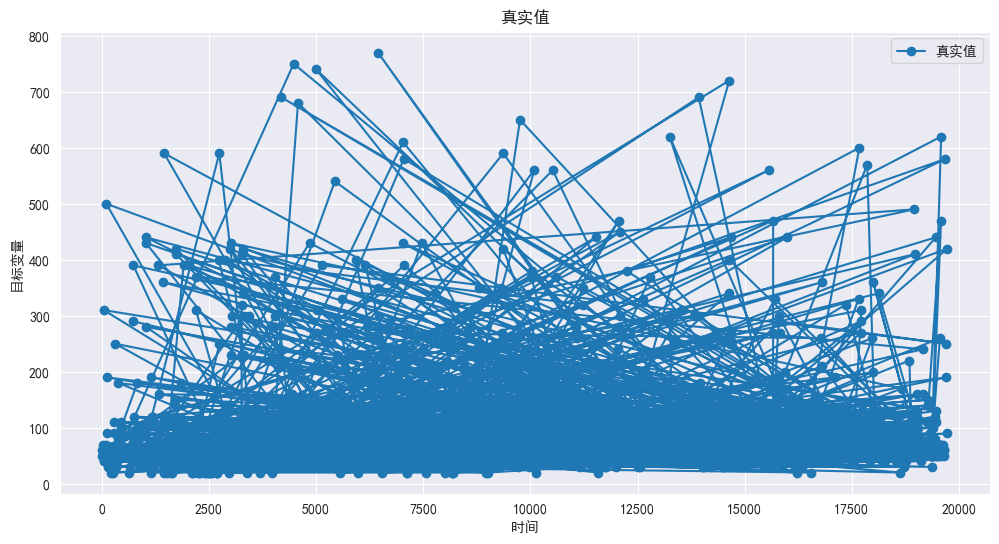

In [38]:
#显示真实值
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='真实值', marker='o')
plt.title('真实值')
plt.xlabel('时间')
plt.ylabel('目标变量')
plt.legend()
plt.show()


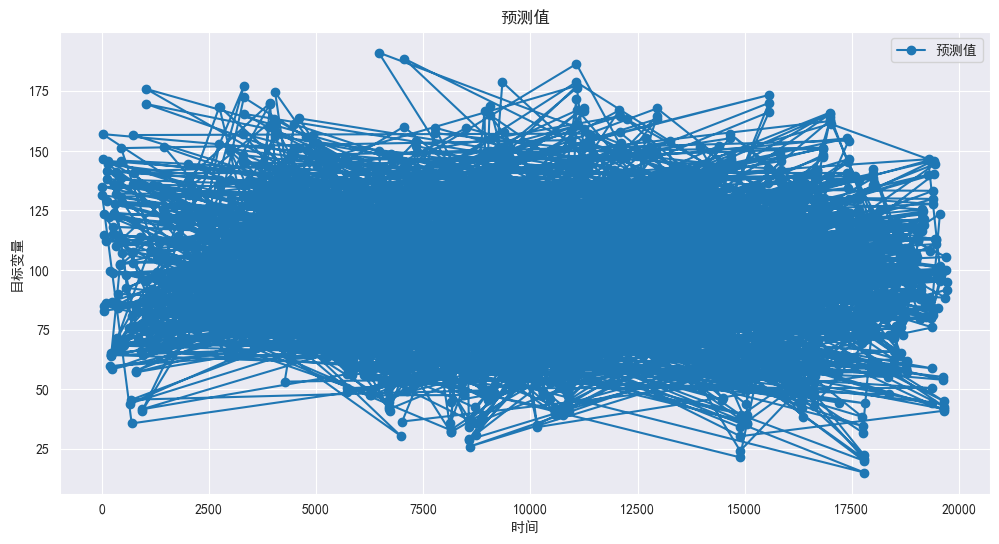

In [39]:
# 显示预测值
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, predictions, label='预测值', marker='o')

plt.title('预测值')
plt.xlabel('时间')
plt.ylabel('目标变量')
plt.legend()
plt.show()


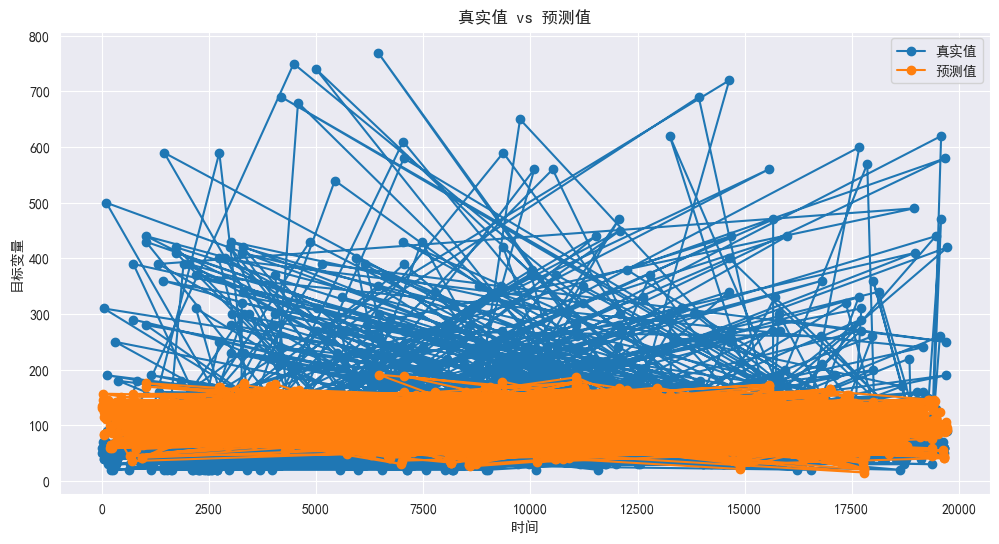

In [40]:
# 对比真实值和预测值
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='真实值', marker='o')
plt.plot(y_test.index, predictions, label='预测值', marker='o')

plt.title('真实值 vs 预测值')
plt.xlabel('时间')
plt.ylabel('目标变量')
plt.legend()
plt.show()


In [41]:
# 评估模型性能
mae = mean_absolute_error(y_test, predictions)
print(f'平均绝对误差: {mae}')

平均绝对误差: 53.000746940606376


# 模型与预测数据本地化

In [73]:
# 保存模型到本地
joblib.dump(model, 'LinearRegression_model.joblib')

['LinearRegression_model01.joblib']

In [74]:
# 将预测数据和真实值合并为一个 DataFrame
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# 输出到 CSV 文件
result_df.to_csv('predictions01.csv', index=False)


In [20]:
# 加载保存的模型
loaded_model = joblib.load('LinearRegression_model.joblib')

# 使用 loaded_model 进行预测
predictions = loaded_model.predict(X_test)